In [34]:
from toolbox.data import read_data, read_geojson, read_coastline
import matplotlib.pyplot as plt

In [35]:
data = read_data()
data.head(10)

,_id,externalId,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,datesPublished,firstSeenAt,...,roommates,shower,smokingInside,toilet,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,additionalCostsDescription
0,5d2b113a43cbfd7c77a998f4,room-1686123,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,2019-07-26 22:18:23.018000+00:00,"[{'$date': '2019-07-14T11:25:46.511+0000'}, {'...",2019-07-14 11:25:46.511000+00:00,...,5,Shared,No,Shared,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...,NaN
1,5d2b113a43cbfd7c77a9991a,studio-1691193,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,2019-08-10 22:28:46.099000+00:00,"[{'$date': '2019-07-14T11:25:46.677+0000'}, {'...",2019-07-14 11:25:46.677000+00:00,...,None,Own,No,Own,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...,NaN
2,5d2b113a43cbfd7c77a99931,room-1690545,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,2019-10-02 22:00:33.141000+00:00,"[{'$date': '2019-07-14T11:25:46.834+0000'}, {'...",2019-07-14 11:25:46.834000+00:00,...,1,Shared,Yes,Shared,Felix,4466569.0,20-07-2019,05-07-2018,https://resources.kamernet.nl/Content/images/p...,NaN
3,5d2b113a43cbfd7c77a9994a,room-1680036,16 m2,16,Assen,https://resources.kamernet.nl/image/84e95365-6...,done,2019-07-18 22:00:31.018000+00:00,"[{'$date': '2019-07-14T11:25:46.988+0000'}, {'...",2019-07-14 11:25:46.988000+00:00,...,4,Shared,Yes,Shared,Albert,783341.0,26-07-2019,09-11-2006,https://resources.kamernet.nl/Content/images/p...,NaN
4,5d2b113b43cbfd7c77a9997c,room-1691356,22 m2,22,Rotterdam,https://resources.kamernet.nl/Content/images/p...,done,2019-08-12 02:06:14.635000+00:00,"[{'$date': '2019-07-14T11:25:47.193+0000'}, {'...",2019-07-14 11:25:47.193000+00:00,...,1,Shared,No,Shared,John,3338401.0,19-07-2019,24-08-2014,https://resources.kamernet.nl/image/3177baf7-5...,NaN
5,5d2b113b43cbfd7c77a99993,room-1690812,14 m2,14,Groningen,https://resources.kamernet.nl/image/5756f247-7...,done,2019-08-10 22:29:17.815000+00:00,"[{'$date': '2019-07-14T11:25:47.347+0000'}, {'...",2019-07-14 11:25:47.347000+00:00,...,4,Shared,Not important,Shared,Marloet,3227373.0,20-07-2019,24-03-2014,https://resources.kamernet.nl/Content/images/p...,NaN
6,5d2b113b43cbfd7c77a999ac,room-1690838,22 m2,22,Zeist,https://resources.kamernet.nl/image/1ca3d9b5-1...,done,2019-07-21 22:15:21.634000+00:00,"[{'$date': '2019-07-14T11:25:47.500+0000'}, {'...",2019-07-14 11:25:47.500000+00:00,...,7,Shared,No,Shared,Georgia,885813.0,22-07-2019,19-05-2007,https://resources.kamernet.nl/Content/images/p...,NaN
7,5d2b113b43cbfd7c77a999c4,room-1691133,17 m2,17,Rotterdam,https://resources.kamernet.nl/image/6be3f88e-f...,done,2019-07-17 22:00:31.941000+00:00,"[{'$date': '2019-07-14T11:25:47.657+0000'}, {'...",2019-07-14 11:25:47.657000+00:00,...,None,Own,No,Own,Carter,3001644.0,21-07-2019,03-05-2013,https://resources.kamernet.nl/image/bc45646b-0...,NaN
8,5d2b113b43cbfd7c77a999da,room-1691166,16 m2,16,Maastricht,https://resources.kamernet.nl/image/6e625591-d...,done,2019-08-10 00:14:27.014000+00:00,"[{'$date': '2019-07-14T11:25:47.814+0000'}, {'...",2019-07-14 11:25:47.814000+00:00,...,4,Shared,No,Shared,John,488742.0,26-07-2019,17-01-2005,https://resources.kamernet.nl/Content/images/p...,NaN
9,5d2b113c43cbfd7c77a999f2,room-1691143,20 m2,20,Callantsoog,https://resources.kamernet.nl/image/bc5ca778-d...,done,2019-08-10 22:29:48.902000+00:00,"[{'$date': '2019-07-14T11:25:47.989+0000'}, {'...",2019-07-14 11:25:47.989000+00:00,...,3,Own,Yes,Own,Nico,782382.0,20-07-2019,07-11-2006,https://resources.kamernet.nl/Content/images/p...,NaN


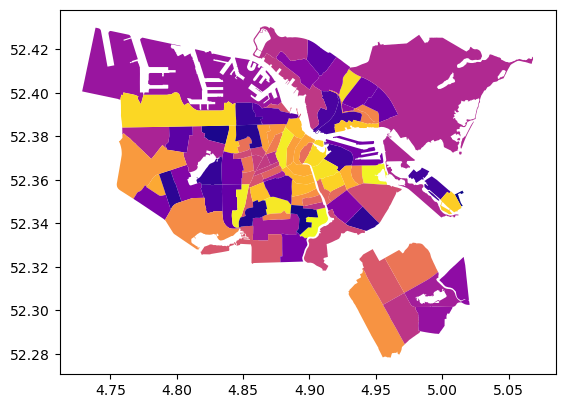

In [36]:
amsterdam = read_geojson()
amsterdam.plot(column='Opp_m2', cmap='plasma')
plt.show()

In [37]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

data = gpd.GeoDataFrame(data, crs={ 'init': 'epsg:4326' }, geometry=[Point(coord) for coord in zip(data['longitude'], data['latitude'])])

/opt/homebrew/Caskroom/mambaforge/base/envs/data-mining-project/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


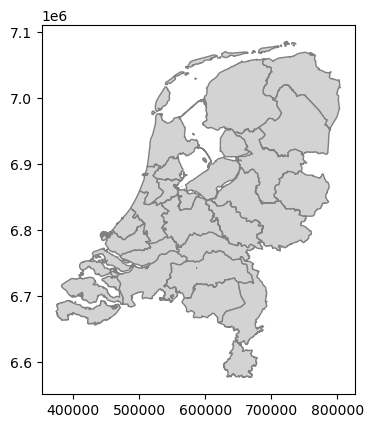

In [38]:
coastline = read_coastline()
coastline.to_crs(epsg=3857).plot(color='lightgrey', edgecolor='grey')
plt.show()

In [39]:
for i, row in coastline.to_crs(epsg=3857).iterrows():
    geometry = row['geometry']

    data_within_region = data[data.to_crs(epsg=3857).within(geometry)]

    coastline.loc[i, 'advertisements'] = len(data_within_region)
    coastline.loc[i, 'mean_rent'] = data_within_region['rent'].mean()
    coastline.loc[i, 'median_rent'] = data_within_region['rent'].median()
    coastline.loc[i, 'mean_rent_per_sqm'] = (data_within_region['rent'] / data_within_region['areaSqm']).mean()
coastline = coastline.fillna(0)

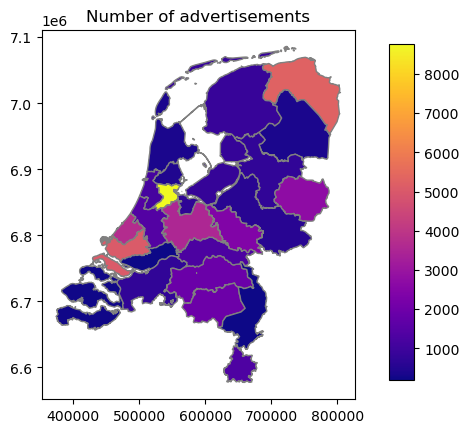

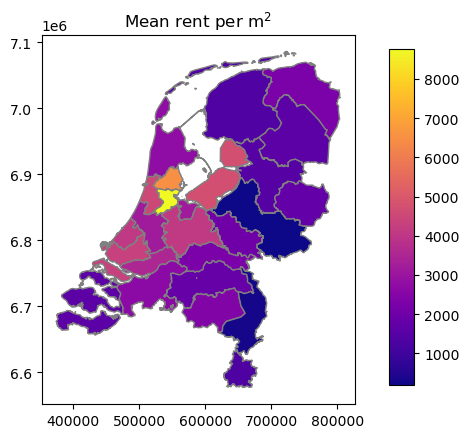

In [40]:
def plot_map(dataframe, column, title=None, cmap=None, figsize=(9, 7), colorbar_axes=None):
    if cmap is None:
        cmap = 'plasma'
    if colorbar_axes is None:
        colorbar_axes = [.81, .15, .04, .7]

    f, ax = plt.subplots()
    plot = dataframe.to_crs(epsg=3857).plot(ax=ax, column=column, edgecolor='grey', cmap=cmap)
    if title is not None:
        ax.set_title(title)

    cax = f.add_axes([.81, .15, .04, .7])
    scalar_mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=coastline['advertisements'].min(),
                                                                          vmax=coastline['advertisements'].max()))
    f.colorbar(scalar_mappable, cax=cax)

plot_map(coastline, 'advertisements', title='Number of advertisements')
plot_map(coastline, 'mean_rent_per_sqm', title=r'Mean rent per $\mathrm{m}^2$')